<a href="https://colab.research.google.com/github/ALTHD12/PROJECT_1_A/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First we have to import all the necessary libraries and the dataset


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

#Generating  datasets
X_blobs, y_blobs = make_blobs(n_samples=300, centers=4, cluster_std=0.7, random_state=0)
X_blobs_scaled = StandardScaler().fit_transform(X_blobs)


X_moons, y_moons = make_moons(n_samples=300, noise=0.1, random_state=0)
X_moons_scaled = StandardScaler().fit_transform(X_moons)

datasets = {
    "Blobs": X_blobs_scaled,
    "Moons": X_moons_scaled
}

The two types of clustering methods; k-means and DBSCAN

In [2]:
# K-Means Clustering
kmeans_blobs = KMeans(n_clusters=4, n_init=10, random_state=0)
kmeans_moons = KMeans(n_clusters=2, n_init=10, random_state=0)

kmeans_blobs_labels = kmeans_blobs.fit_predict(X_blobs_scaled)
kmeans_moons_labels = kmeans_moons.fit_predict(X_moons_scaled)

# DBSCAN Clustering
dbscan_blobs = DBSCAN(eps=0.3, min_samples=5)
dbscan_moons = DBSCAN(eps=0.3, min_samples=5)

dbscan_blobs_labels = dbscan_blobs.fit_predict(X_blobs_scaled)
dbscan_moons_labels = dbscan_moons.fit_predict(X_moons_scaled)

results = {
    "K-Means on Blobs": (X_blobs_scaled, kmeans_blobs_labels),
    "K-Means on Moons": (X_moons_scaled, kmeans_moons_labels),
    "DBSCAN on Blobs": (X_blobs_scaled, dbscan_blobs_labels),
    "DBSCAN on Moons": (X_moons_scaled, dbscan_moons_labels)
}

Visualisation

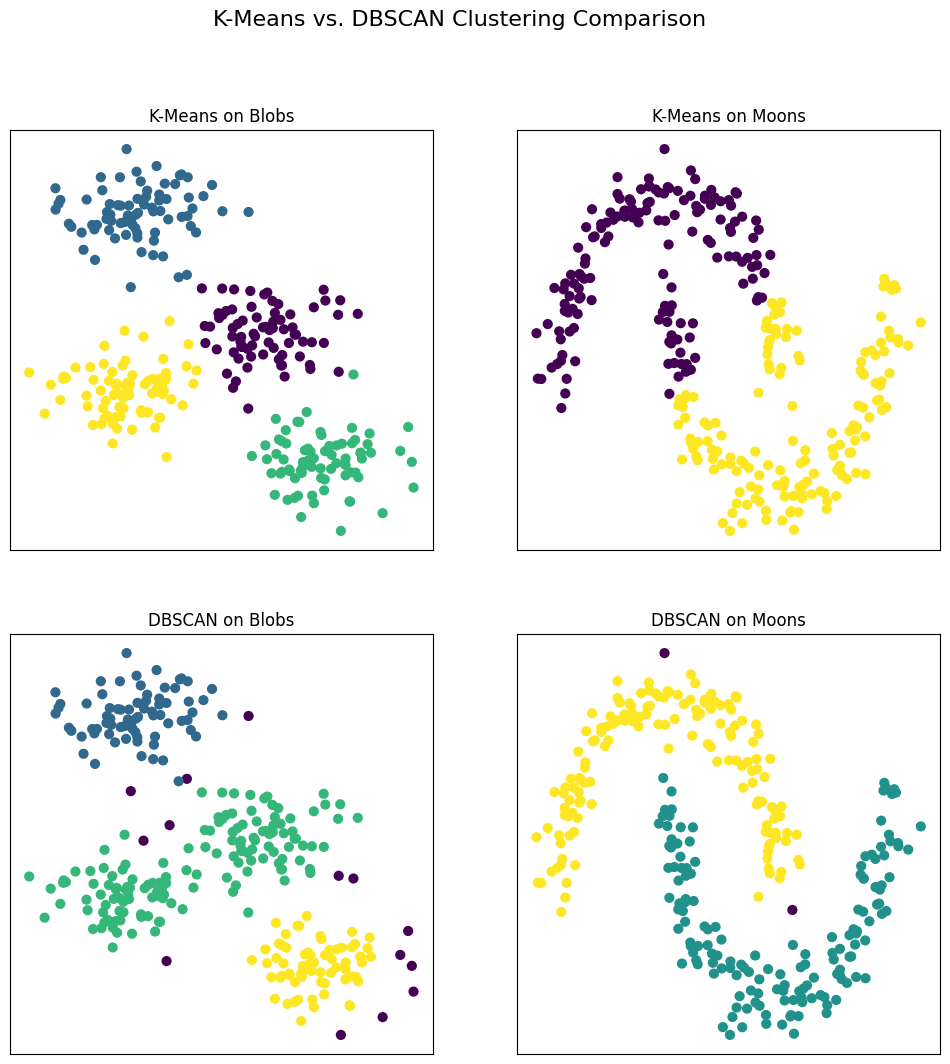

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('K-Means vs. DBSCAN Clustering Comparison', fontsize=16)

ax = axes.ravel()

for i, (title, (X, labels)) in enumerate(results.items()):
    ax[i].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=40)
    ax[i].set_title(title)
    ax[i].set_xticks(())
    ax[i].set_yticks(())

plt.show()

We can see that the k-means clustering fails to understand the nested cluster